In [239]:
import pandas as pd
import numpy as np
import mglearn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [240]:
# Loading Dataset with features and Target Variables
# target names - ['malignant', 'benign'] = [0,1]

In [241]:
cancer = load_breast_cancer()
df = pd.DataFrame(data= cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [242]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [243]:
# Separating out the target
y = cancer.target
x = df.drop(columns=['target'])
features = x.columns

In [244]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [245]:
x.shape

(569, 30)

---------
## How many PCs explain over 90% of the variability?

In [189]:
# create principal components 
pca = PCA(n_components = 0.9)  # will return a number of PC  that explain 90% of variability in data !!!
principalComponents = pca.fit_transform(x)

In [190]:
principalComponents.shape

(569, 7)

In [191]:
## 7 PC out of 30 explain  over 90% of the variability in our data

In [192]:
# New dataset from principal components 
df1 = pd.DataFrame(data=principalComponents, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
df1['target'] = y
df1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0


In [193]:
# Calculate the variance explained by priciple components

print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]

 Total Variance Explained: 91.01


 This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

In [194]:
pca.explained_variance_   #  is a row value for the variance each PC is eplaining

# THIS IS EIGEN VALUE - of each PC 

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888])

--------
## Zero in on your 1st and 2nd PCs, and discuss whether it makes sense for certain features  to go together vs opposite direction

In [205]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values[0])   # eigen value for the first PC
print(eig_vectors[0])  # recepie for construction of 1st PC

13.304990794374538
[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]


In [196]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values[1])
print(eig_vectors[1])  # recepie for construction of 2nd PC

5.701374603726142
[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [197]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [198]:
print(pc1)
print(pc2)

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


## What does your scree plot look like

Text(0,0.5,'proportion of explained variance')

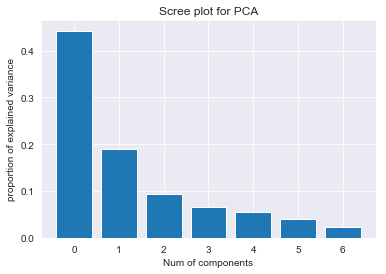

In [199]:
# show the proportion of variability in data each PC explaining 

index = np.arange(7)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

## PC1 - SHAPE

In [206]:
# Load proportions of each features in PC1 Singular Vector

In [ ]:
# In order to construct PC1 we ned to take appropriate amount from the features - loadings
# Show linear combination to make PC1. All features covary in the same direction different degree

In [200]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features).sort_values(ascending=False)
str_loading_1.iloc[:]

mean concave points        0.951490
mean concavity             0.942542
worst concave points       0.915132
mean compactness           0.872817
worst perimeter            0.863167
worst concavity            0.834453
worst radius               0.831641
mean perimeter             0.829965
worst area                 0.820238
mean area                  0.806101
mean radius                0.798469
perimeter error            0.770833
worst compactness          0.766346
radius error               0.751328
area error                 0.739987
concave points error       0.669033
compactness error          0.621527
concavity error            0.560234
mean smoothness            0.520110
mean symmetry              0.503978
worst fractal dimension    0.480695
worst smoothness           0.466720
worst symmetry             0.448307
worst texture              0.381062
mean texture               0.378346
fractal dimension error    0.374128
mean fractal dimension     0.234772
symmetry error             0

## PC2 - Image rusults

In [208]:
# Load proportions of each features in PC2 Singular Vector (Eigenvector of PC2)

In [201]:
# get the loadings
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=features).sort_values(ascending=False)

In [202]:
str_loading_2.iloc[:]

mean fractal dimension     0.875292
fractal dimension error    0.668791
worst fractal dimension    0.657443
compactness error          0.555669
smoothness error           0.488130
concavity error            0.470883
mean symmetry              0.454506
mean smoothness            0.444392
symmetry error             0.438984
worst smoothness           0.411421
mean compactness           0.362680
worst compactness          0.342865
worst symmetry             0.338783
concave points error       0.311176
worst concavity            0.233914
texture error              0.214849
mean concavity             0.143660
worst concave points      -0.019716
mean concave points       -0.083016
worst texture             -0.108565
mean texture              -0.142564
perimeter error           -0.213602
radius error              -0.252033
area error                -0.363638
worst perimeter           -0.477261
mean perimeter            -0.513800
worst area                -0.523759
worst radius              -0

## Ploting PC1 vs PC2

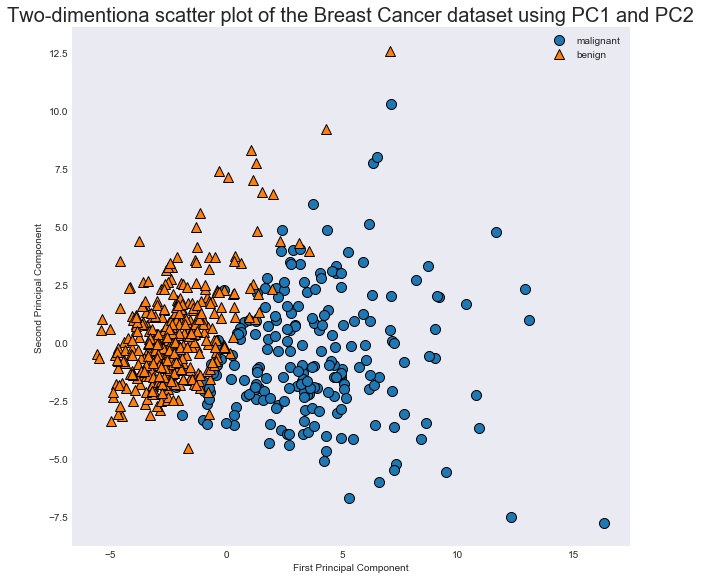

In [238]:
plt.figure(figsize=(10,10))
mglearn.discrete_scatter(df1.PC1, df1.PC2, y)
plt.legend(cancer.target_names, loc = "best")
plt.gca().set_aspect("equal")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Two-dimentiona scatter plot of the Breast Cancer dataset using PC1 and PC2", size = 20)
plt.show()

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

In [213]:
X = cancer.data
y = cancer.target
start = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = time.time()
print('Accuracy:', acc)
print ('Time Taken:', end - start)

Accuracy: 0.9385964912280702
Time Taken: 0.016552209854125977


In [215]:
X = df1[['PC1', 'PC2']]
y = df1['target']

start = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = time.time()
print('Accuracy:', acc)
print ('Time Taken:', end - start)


Accuracy: 0.9385964912280702
Time Taken: 0.010258913040161133


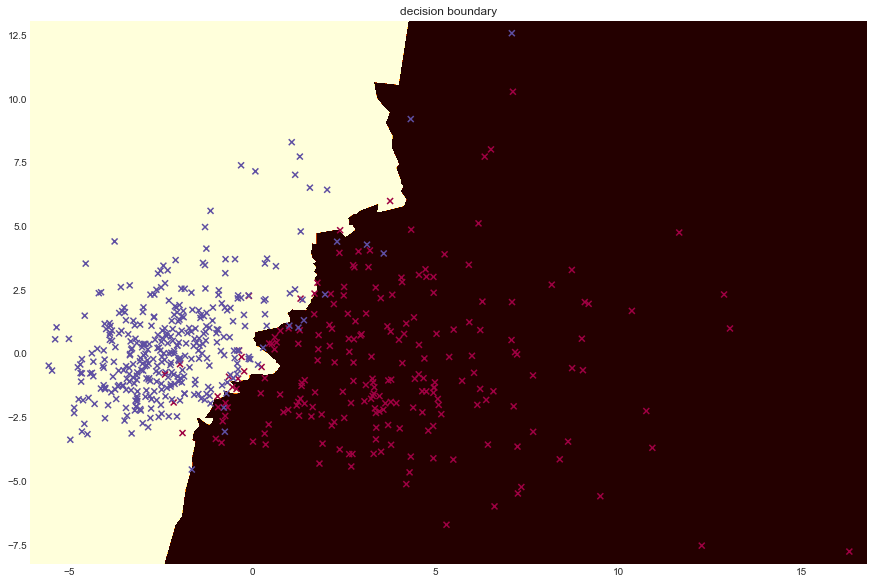

In [216]:
# Plot decision boundary using principal components 
import numpy as np 
def decision_boundary(pred_func):
    
    # Set the boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # Build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral, marker='x')

decision_boundary(lambda x: model.predict(x))

plt.title('decision boundary');